In [1]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
import numpy as np
import pandas as pd
import json

In [3]:
# #encoding='utf-8' so that emojis (unicode character) can be translated to binary - otherwise, error will result
# with open(r'/content/sample_data/QuitVaping_submissions', 'r', encoding='utf-8') as f:
#   df = pd.read_json(f, lines=True)
# df.to_csv('all_posts_csv.csv', encoding='utf-8', index=False)

In [4]:
df = pd.read_csv('/content/predicted_labels.csv')
print(df)

FileNotFoundError: ignored

In [7]:
exp_posts = pd.read_csv('/content/experience_posts.csv')

In [8]:
a, b, c, d = [],[],[],[]
for ind, i in enumerate(exp_posts['selftext']):
  l = len(i.split())
  if exp_posts['score'][ind] >= 22:
    d.append(l)
  if exp_posts['score'][ind] >=13:
    c.append(l)
  elif exp_posts['score'][ind] <=7 and exp_posts['score'][ind] > 0:
    b.append(l)
  elif exp_posts['score'][ind] == 0:
    a.append(l)
sum(a)/len(a), sum(b)/len(b), sum(c)/len(c), sum(d)/len(d)

(220.0, 132.81578947368422, 204.13657407407408, 235.04558404558404)

In [9]:
import math
for ind, i in enumerate(df['selftext']):
  if type(i) != str and math.isnan(i):
    df.drop(ind, inplace=True)
  elif "[removed]" in i or "[deleted]" in i:
    df.drop(ind, inplace=True)
print(df['selftext'])

NameError: ignored

In [ ]:
df = df.reset_index()
print(df['selftext'])

In [ ]:
posts = list(df['selftext'])
print(len(posts))

df2 = df.copy()['selftext'].drop_duplicates(keep = 'first')
print(len(df2))
for ind, i in enumerate(df2):
  if posts.count(i) > 1:
    df.drop(posts.index(i), inplace=True)
    posts.remove(i)
    print(len(posts), len(df))
print(len(df))

In [ ]:
import copy
exp_posts = copy.deepcopy(df)
for ind, i in enumerate(df['labels']):
  if i not in [1.0]:
    exp_posts.drop(ind, inplace=True)
exp_posts = exp_posts.reset_index()
exp_posts

In [11]:
import csv
exp_posts.to_csv("experience_posts.csv")

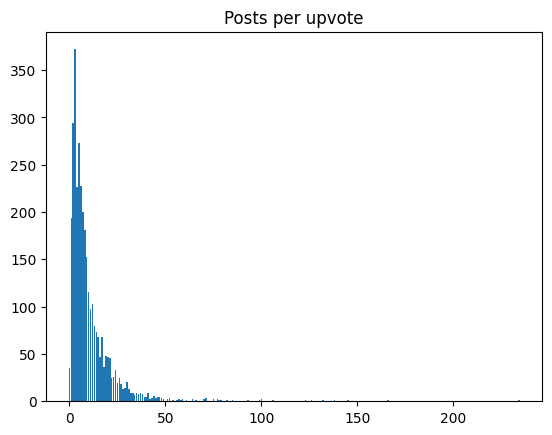

In [12]:
import matplotlib.pyplot as plt
post_dict = {}
for score in exp_posts['score']:
  if score in post_dict:
      post_dict[score] += 1
  else:
      post_dict[score] = 1
plt.bar(list(post_dict.keys()), list(post_dict.values()))
plt.title('Posts per upvote')
plt.show()

In [13]:
scores = list(exp_posts['score'])
# for ind, i in enumerate(sorted(scores)):
#   if ind == 348:
#     low = i
#   if ind == 696:
#     mid = i
#   if ind == 1044:
#     high = i

texts = [[], [], [], []]
for ind, score in enumerate(exp_posts['score']):
  if score == 0:
    texts[0].append(exp_posts['selftext'][ind])
  elif score > 0 and score <=7:
    texts[1].append(exp_posts['selftext'][ind])
  # else:
  #   texts[2].append(exp_posts['selftext'][ind]) # 8 or above
  if score >= 8:
    texts[2].append(exp_posts['selftext'][ind])
  if score >= 22:
    texts[3].append(exp_posts['selftext'][ind])

print(len(texts[0]), len(texts[1]), len(texts[2]), len(texts[3]))

low = {"text": texts[0]}
low_mid = {"text": texts[1]}
high_mid = {"text": texts[2]}
high = {"text": texts[3]}
low_df = pd.DataFrame(low)
low_mid_df = pd.DataFrame(low_mid)
high_mid_df = pd.DataFrame(high_mid)
high_df = pd.DataFrame(high)

35 1786 1513 351


In [14]:
#Make new column "label" to store the dictionary of sentiment intensity (intensity of pos/neg/neut sent.)
# df['label'] = df['selftext'].apply(lambda review:sid.polarity_scores(review))
low_df['sentiment_scores'] = low_df['text'].apply(lambda review:sid.polarity_scores(review))
low_mid_df['sentiment_scores'] = low_mid_df['text'].apply(lambda review:sid.polarity_scores(review))
high_mid_df['sentiment_scores'] = high_mid_df['text'].apply(lambda review:sid.polarity_scores(review))
high_df['sentiment_scores'] = high_df['text'].apply(lambda review:sid.polarity_scores(review))

In [ ]:
from pprint import pprint
#Example
# pprint(exp_posts['selftext'][100])
# print(exp_posts['score'][100])
# print(exp_posts['created_utc'][100])
# print(exp_posts['sentiment_scores'][100])
# print(exp_posts['sentiment_scores'][100]['compound'])
pprint(high_df['text'][100])
print(high_df['sentiment_scores'][100])

In [15]:
def average(scores):
  sum = 0
  for score in scores:
    sum += score['compound']
  return str(sum/len(scores))
print("Average compound sentiment for score 0 = "+ average(low_df['sentiment_scores']))
print("Average compound sentiment for scores 1-7 = "+ average(low_mid_df['sentiment_scores']))
print("Average compound sentiment for scores 8 and above = "+ average(high_mid_df['sentiment_scores']))
print("Average compound sentiment top 10% = "+ average(high_df['sentiment_scores']))

Average compound sentiment for score 0 = 0.03700285714285715
Average compound sentiment for scores 1-7 = 0.09409479283314681
Average compound sentiment for scores 8 and above = 0.3154886979510907
Average compound sentiment top 10% = 0.3541646723646723


In [ ]:
!pip install bertopic
from bertopic import BERTopic
import json
import pandas as pd
from google.colab import files

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))
new_stopwords =["vaping", "vape", "nicotine", "cigarettes", "cigarette", "juul", "juice", "juices", "smoking",
                "smoke", "tobacco", "nic", "cigs", "vaped", "vapes"]
new_stopwords2 =["im","quit", "quitting", "ive", "i've"]
new_stopwords3 =["year","years", "day", "days", "since", "ago", "week", "weeks", "today", "months", "month"]
stop_words = stop_words.union(new_stopwords, new_stopwords2) #, new_stopwords3) - include temporal terms

def clean_text(posts):
  cleaned_posts = []
  for sentences in posts:
    split = re.findall(r"[\w']+|[!?]", sentences)
    i = 0
    while i < len(split)-1:
      if split[i] == split[i+1]:
        del split[i+1]
        i-=1
      i+= 1
    # Remove all instances of \n where only the n remains
    split = [i for i in split if i != "n" and i not in stop_words]
    cleaned_posts.append(" ".join(split))
  return cleaned_posts

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
l, l_m, h_m, h = map(list, [low_df["text"], low_mid_df["text"], high_mid_df["text"], high_df["text"]])
l, l_m, h_m, h = map(clean_text, [l, l_m, h_m, h])
from sklearn.feature_extraction.text import CountVectorizer
# we add this to remove stopwords
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=list(stop_words))

topic_model = BERTopic(vectorizer_model=vectorizer_model,
                       top_n_words=80,
    language='english', calculate_probabilities=True,
    verbose=True)

def get_topic(saved_column, name):
  #print(len(topics)) will print 3397 - "topics" is a list of numbers that labels posts with topics
  topics, probs = topic_model.fit_transform(saved_column)
  topic_model.get_topic_info()
  freq = topic_model.get_topic_info()
  freq.to_csv(name+".csv", index=False)
  # fig = topic_model.visualize_barchart()
  # fig.write_html(name)
  for i in range(len(freq)):
    print(freq.iloc[i])  # freq.iloc[i][0, 1, 2, 3, 4] will get columns

get_topic(h, "high")
print("=" * 20)
get_topic(h_m, "high_mid")
print("=" * 20)
get_topic(l, "low")
print("=" * 20)
get_topic(l_m, "low_mid")

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

2023-09-03 01:07:16,390 - BERTopic - Transformed documents to Embeddings
2023-09-03 01:07:19,777 - BERTopic - Reduced dimensionality
2023-09-03 01:07:19,811 - BERTopic - Clustered reduced embeddings


Topic                                                                 -1
Count                                                                172
Name                                               -1_like_time_feel_get
Representation         [like, time, feel, get, days, day, would, life...
Representative_Docs    [Longtime lurker group clean almost 5 months c...
Name: 0, dtype: object
Topic                                                                  0
Count                                                                 42
Name                                              0_time_like_would_much
Representation         [time, like, would, much, day, get, really, go...
Representative_Docs    [I saw post r coolguides posted comment experi...
Name: 1, dtype: object
Topic                                                                  1
Count                                                                 31
Name                                            1_days_day_even_cravings
Repre

Batches:   0%|          | 0/27 [00:00<?, ?it/s]

2023-09-03 01:08:30,862 - BERTopic - Transformed documents to Embeddings
2023-09-03 01:08:36,290 - BERTopic - Reduced dimensionality
2023-09-03 01:08:36,359 - BERTopic - Clustered reduced embeddings


Topic                                                                 -1
Count                                                                400
Name                                               -1_like_day_time_days
Representation         [like, day, time, days, feel, get, one, would,...
Representative_Docs    [365 days free today ! Here tips helped get 1 ...
Name: 0, dtype: object
Topic                                                                  0
Count                                                                179
Name                                            0_cravings_days_day_like
Representation         [cravings, days, day, like, feel, time, free, ...
Representative_Docs    [When craving heres makes give But first let s...
Name: 1, dtype: object
Topic                                                                  1
Count                                                                112
Name                                               1_time_like_day_would
Repre

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2023-09-03 01:08:44,416 - BERTopic - Transformed documents to Embeddings
2023-09-03 01:08:46,845 - BERTopic - Reduced dimensionality
2023-09-03 01:08:46,853 - BERTopic - Clustered reduced embeddings


Topic                                                                 -1
Count                                                                 35
Name                                                -1_like_one_day_time
Representation         [like, one, day, time, got, days, know, going,...
Representative_Docs    [I'm 33 Older everyone sub Doesn't mean jack s...
Name: 0, dtype: object


Batches:   0%|          | 0/56 [00:00<?, ?it/s]

2023-09-03 01:10:24,409 - BERTopic - Transformed documents to Embeddings
2023-09-03 01:10:34,179 - BERTopic - Reduced dimensionality
2023-09-03 01:10:34,355 - BERTopic - Clustered reduced embeddings


Topic                                                                 -1
Count                                                                910
Name                                               -1_like_day_time_feel
Representation         [like, day, time, feel, get, really, days, kno...
Representative_Docs    [Thought I would add data point case encourage...
Name: 0, dtype: object
Topic                                                                  0
Count                                                                212
Name                                               0_like_feel_know_want
Representation         [like, feel, know, want, time, day, get, life,...
Representative_Docs    [I got bored covid lockdowns time I even consi...
Name: 1, dtype: object
Topic                                                                  1
Count                                                                120
Name                                         1_cravings_days_day_craving
Repre

In [ ]:
#Save posts and scores for each post as csv
selected_columns = exp_posts[['selftext', 'sentiment_scores']]
selected_columns.to_csv('VADER2.csv', index=False)

In [ ]:
#Test a new "post" to see if it is pos/neg/neut
review = "I hate my life and am very depressed. I have tried many times to quit vaping but always failed. I want to quit really bad but I feel helpless"
sid.polarity_scores(review)